In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [4]:
# Read the Mouse Drug Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
mouse_drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
# Read the Clinical Trial Data
clinical_trial = pd.read_csv(clinical_trial_data_to_load)
clinical_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into one single dataset
# Outer - Returns all rows from both tables
merged_data = pd.merge(mouse_drug, clinical_trial, on="Mouse ID", how="outer")

In [7]:
# Display the data table for preview
merged_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [20]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = merged_data.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
#tumor_mean

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [19]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se = merged_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
#tumor_se
# Convert to DataFrame
tumor_se_df = pd.DataFrame(tumor_se)

# Preview DataFrame
tumor_se_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

# Minor Data Munging to Re-Format the Data Frames

In [48]:
# Tumor Mean reformatting
tumor_mean_reformat = tumor_mean_df.reset_index()
tumor_mean_pivot = tumor_mean_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
tumor_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [49]:
# Tumor Standard Error reformat
tumor_se_reformat = tumor_se_df.reset_index()
tumor_se_pivot = tumor_se_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
tumor_se_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


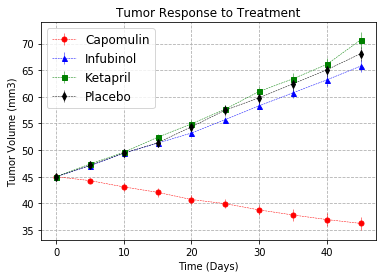

In [35]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(6,4))

plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Capomulin"], yerr=tumor_se_pivot["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Infubinol"], yerr=tumor_se_pivot["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Ketapril"],yerr=tumor_se_pivot["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Placebo"],yerr=tumor_se_pivot["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

# Adding labels

# Adding main title
plt.title("Tumor Response to Treatment")

# Adding x and y labels
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the figure
plt.savefig("Tumor_Response_Treatment_Plot.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [41]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_site_mean = merged_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']
#meta_site_mean

# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_site_mean)

# Preview DataFrame
meta_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [45]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_site_se = merged_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
#meta_site_se

# Convert to DataFrame
meta_se_df = pd.DataFrame(meta_site_se)

# Preview DataFrame
meta_se_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

# Minor Data Munging to Re-Format the Data Frames

In [55]:
# Meta Sites Mean Minor Data Munging to Re-Format the Data Frames
meta_mean_reformat = meta_mean_df.reset_index()
meta_mean_pivot = meta_mean_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
meta_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [53]:
# Meta Sites Standard Error Minor Data Munging to Re-Format the Data Frames
meta_se_reformat = meta_se_df.reset_index()
meta_se_pivot = meta_se_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

meta_se_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


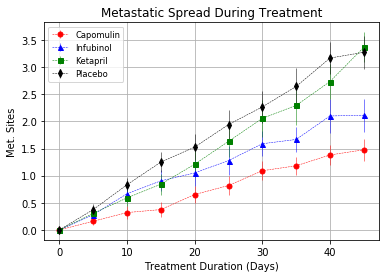

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

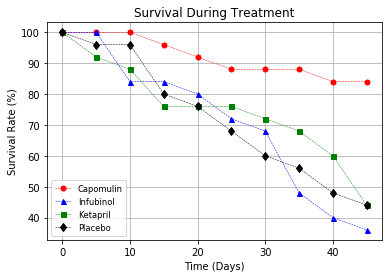

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

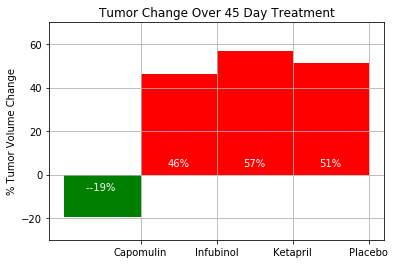